In [14]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
titanic_data = pd.read_csv('train.csv')

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
X = titanic_data.drop(['PassengerId','Survived','Name','Ticket','Cabin'], axis = 1)

In [6]:
y = titanic_data.Survived

In [7]:
X = pd.get_dummies(X)

In [8]:
X = X.fillna({'Age':X.Age.median()}) #may upgraid (for female them median, for male them median)

In [9]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [12]:
clf = tree.DecisionTreeClassifier()

In [13]:
parametrs = {'criterion': ['gini','entropy'], 'max_depth':range(1,30)}

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=5)

In [17]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [18]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 8}

In [19]:
best_clf = grid_search_cv_clf.best_estimator_

In [24]:
best_clf.score(X_test, y_test) #score from Decision tree

0.7864406779661017

In [21]:
from sklearn.metrics import precision_score, recall_score

In [22]:
y_pred = best_clf.predict(X_test)

In [25]:
precision_score(y_test, y_pred) # precision_score from Decision tree

0.8

In [26]:
recall_score(y_test, y_pred)

0.6333333333333333

In [27]:
y_predicted_prob = best_clf.predict_proba(X_test)

<AxesSubplot:>

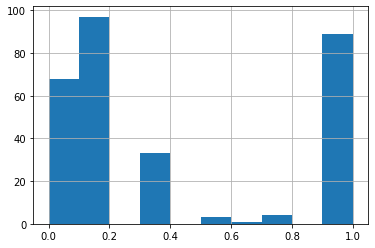

In [28]:
pd.Series(y_predicted_prob[:, 1]).hist()

In [35]:
y_pred = np.where(y_predicted_prob[:,1] > 0.9, 1, 0) #теперь, человек выживает, если его вероятность больше 0,8

In [36]:
precision_score(y_test, y_pred)

0.8089887640449438

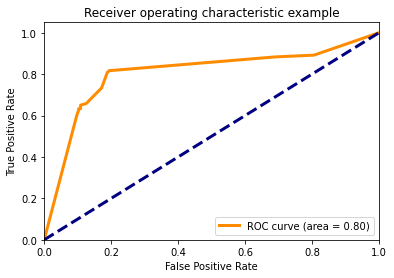

In [37]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
lw = 3
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [38]:
#now we are solving with the help of random forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
clf_rf = RandomForestClassifier()

In [65]:
parametrs = {'n_estimators': range(10,31), 'max_depth':range(2,11) }

In [66]:
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5)

In [67]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 11),
                         'n_estimators': range(10, 31)})

In [68]:
grid_search_cv_clf.best_params_

{'max_depth': 6, 'n_estimators': 10}

In [69]:
best_clf = grid_search_cv_clf.best_estimator_

In [70]:
best_clf.score(X_test,y_test) #score from Random Forest

0.8271186440677966

In [51]:
feature_importances = best_clf.feature_importances_ #информация по фитчам, какой эффективнее влияет на предсказания

In [49]:
feature_importances_df = pd.DataFrame({'features':list(X_train), 'feature_importances':feature_importances})

In [50]:
feature_importances_df.sort_values('feature_importances',ascending=False)

,features,feature_importances
5,Sex_female,0.316449
6,Sex_male,0.170725
4,Fare,0.167994
0,Pclass,0.120039
1,Age,0.109865
2,SibSp,0.044354
3,Parch,0.028972
7,Embarked_C,0.019423
9,Embarked_S,0.015869
8,Embarked_Q,0.006311


In [52]:
titanic_data.corr() #показывает связь между фитчами

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000
